## This is an attempt to implement the Point operators
From section 3.1 of Computer Vision - Algorithms and Applications 2nd Edition, Richard Szeliski

## 3.1.1

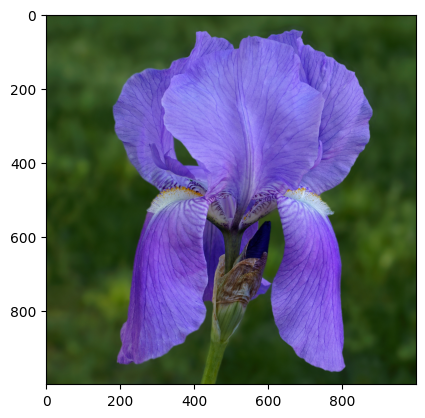

In [3]:
# Load image Iris.jpg
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image
image = cv2.imread('dat/Iris.jpg')
# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the image using matplotlib
plt.imshow(image_rgb)


### Contrast


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.5].


Text(0.5, 1.0, 'Processed Image')

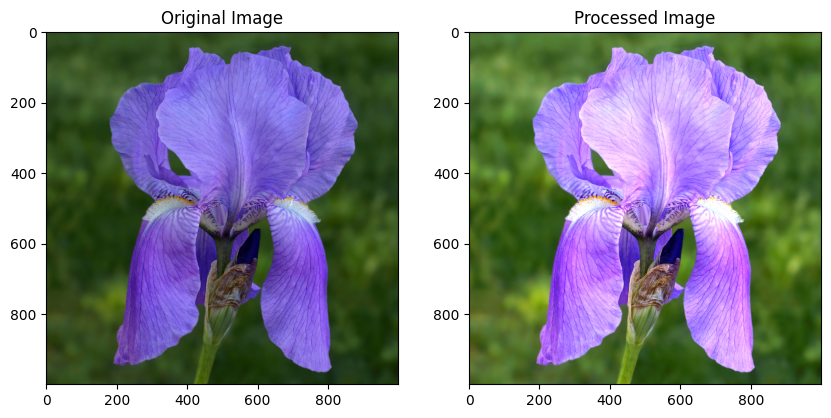

In [4]:
# mean illumination
img = image_rgb/np.max(image_rgb, axis=(0, 1))
gain = 1.5 # contrast
bias = 0 # brightness
img = img * gain + bias
#show original and processed images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.title('Processed Image')


Text(0.5, 1.0, 'Processed Image')

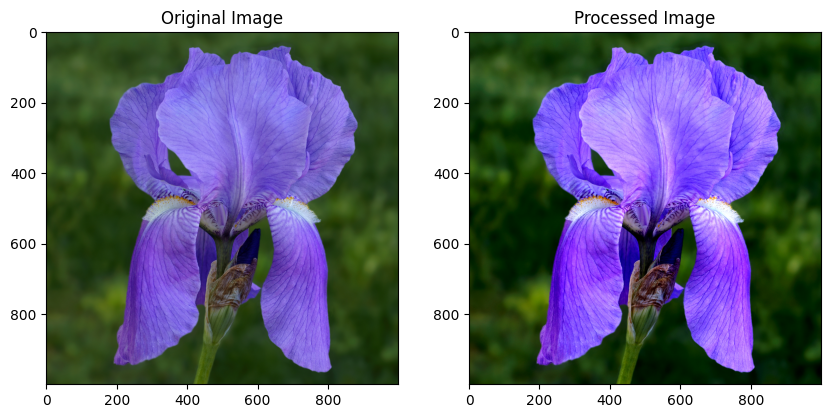

In [5]:
# We might want to independently adjust the brightness and contrast
# but we see in the above result that increasing the gain results in increased brightness.
img = image_rgb/np.max(image_rgb, axis=(0, 1))
mean = np.mean(img, axis=(0, 1))
gain = 1.5 # contrast
bias = 0 # brightness
img = img * gain + bias
img = img - (np.mean(img)-mean )
img = np.clip(img, 0, 1)  # Ensure pixel values are in [0, 1]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.title('Processed Image')

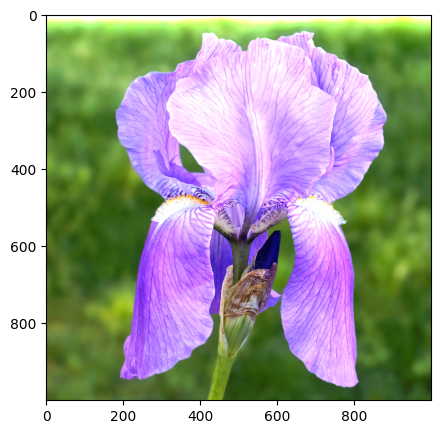

In [6]:
# spatial varying gain and bias
img = image_rgb/np.max(image_rgb, axis=(0, 1))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        gain = 1.5 +  50 * np.sin(1/(i+1))  # Varying gain
        bias = 0.01* np.cos(1/(j+1))  # Varying bias
        img[i, j] = img[i, j] * gain + bias
img = np.clip(img, 0, 1)  # Ensure pixel values are in [0, 1]
plt.figure(figsize=(10, 5))
plt.imshow(img)


**Inverse gamma correction**

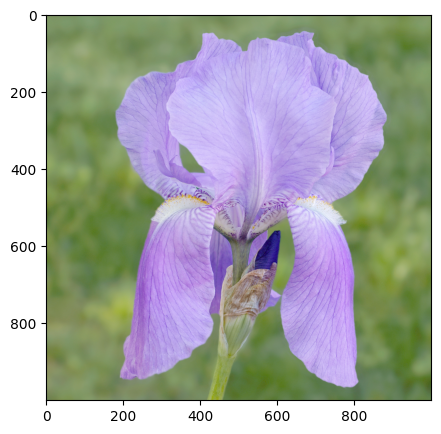

In [7]:
img = image_rgb / np.max(image_rgb, axis=(0, 1))
gamma = 2.2  # Gamma value
img = np.power(img, 1/gamma)
img = np.clip(img, 0, 1)
plt.figure(figsize=(10, 5))
plt.imshow(img)


## 3.1.2
scale each channel independently

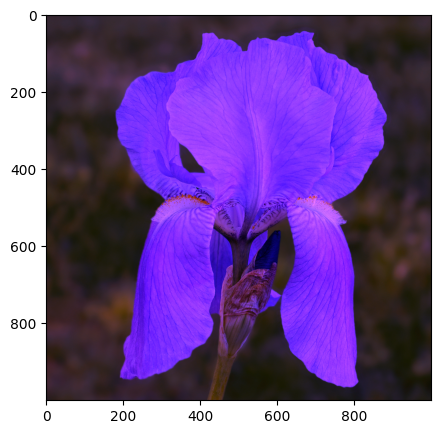

In [8]:
img = image_rgb / np.max(image_rgb, axis=(0, 1))
img[:, :, 0] = img[:, :, 0] * 1  # Red channel
img[:, :, 1] = img[:, :, 1] * 0.5  # Green channel
img[:, :, 2] = img[:, :, 2] * 1.5  # Blue channel
img = np.clip(img, 0, 1)  # Ensure pixel values are in [0, 1]
plt.figure(figsize=(10, 5))
plt.imshow(img)

- In section 3.2.3 Matting is discussed but not in great detail. So we skip the implementation (also extensive work has been done in this area, so not some straightforward implementation).

## 3.1.4 Histogram Equalization


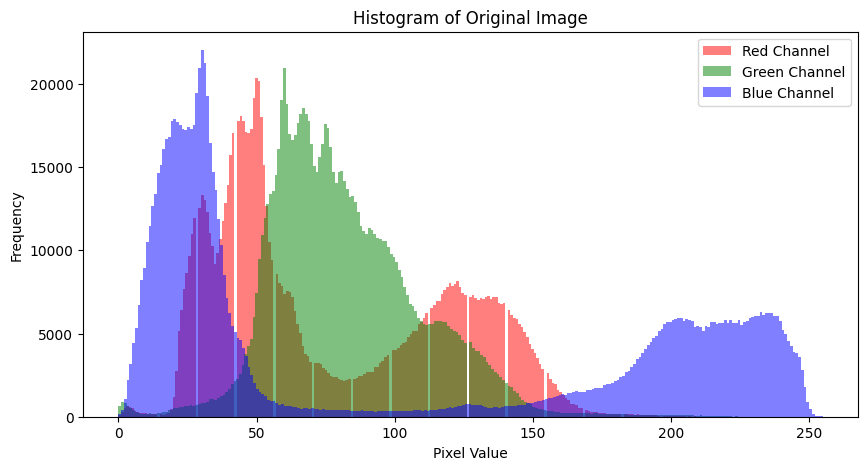

In [9]:
# greyscale image
img_grey = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
img = image_rgb
# plot histogram of the original image
plt.figure(figsize=(10, 5))
plt.hist(image_rgb[:,:, 0].ravel(), bins=256, color='red', alpha=0.5, label='Red Channel')
plt.hist(image_rgb[:, :, 1].ravel(), bins=256, color='green', alpha=0.5, label='Green Channel')
plt.hist(image_rgb[:, :, 2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue Channel')
# plt.hist(img_grey.ravel(), bins=256, color='grey', alpha=0.5, label='Greyscale Image')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.legend()
plt.show()


Cumulative distribution function (CDF) for all channels.

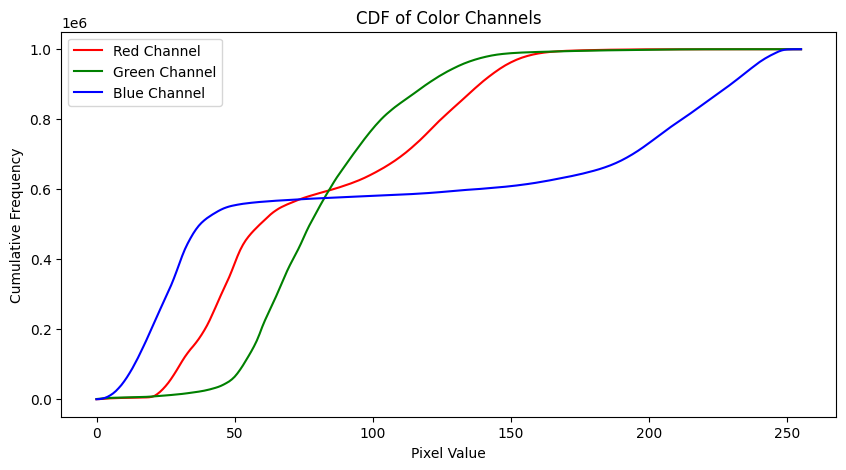

In [10]:
img = image_rgb

red_cdf = np.cumsum(np.histogram(img[:, :, 0], bins=256, range=(0, 256))[0])
green_cdf = np.cumsum(np.histogram(img[:, :, 1], bins=256, range=(0, 256))[0])
blue_cdf = np.cumsum(np.histogram(img[:, :, 2], bins=256, range=(0, 256))[0])

plt.figure(figsize=(10, 5))
plt.plot(red_cdf, color='red', label='Red Channel')
plt.plot(green_cdf, color='green', label='Green Channel')
plt.plot(blue_cdf, color='blue', label='Blue Channel')
plt.title('CDF of Color Channels')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Frequency')
plt.legend()
plt.show()



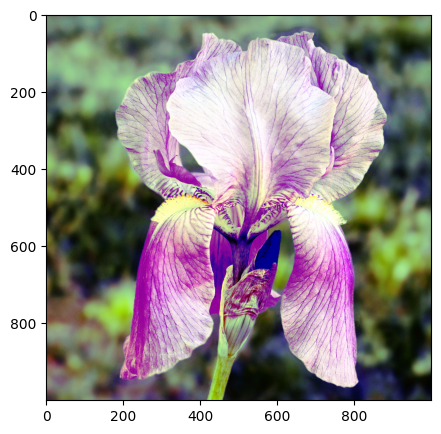

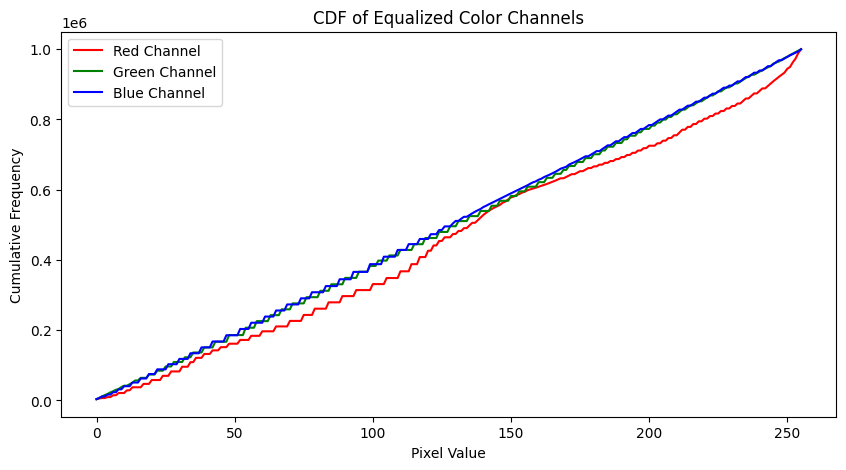

In [11]:
img = image_rgb / np.max(image_rgb, axis=(0, 1))
red_img = img[:, :, 0] 
green_img = img[:, :, 1]
blue_img = img[:, :, 2]

red_cdf = red_cdf / red_cdf[-1]  
green_cdf = green_cdf / green_cdf[-1]  
blue_cdf = blue_cdf / blue_cdf[-1]  

red_img_eq = np.interp(red_img.flatten(), np.linspace(0, 1, 256), red_cdf).reshape(red_img.shape)
green_img_eq = np.interp(green_img.flatten(), np.linspace(0, 1, 256), green_cdf).reshape(green_img.shape)
blue_img_eq = np.interp(blue_img.flatten(), np.linspace(0, 1, 256), blue_cdf).reshape(blue_img.shape)
img_eq = np.stack((red_img_eq, green_img_eq, blue_img_eq), axis=-1)

plt.figure(figsize=(10, 5))
plt.imshow(img_eq)

# plot cdf of new channels
red_cdf_eq = np.cumsum(np.histogram(img_eq[:, :, 0], bins=256, range=(0, 1))[0])
green_cdf_eq = np.cumsum(np.histogram(img_eq[:, :, 1], bins=256, range=(0, 1))[0])
blue_cdf_eq = np.cumsum(np.histogram(img_eq[:, :, 2], bins=256, range=(0, 1))[0])
plt.figure(figsize=(10, 5))
plt.plot(red_cdf_eq, color='red', label='Red Channel')
plt.plot(green_cdf_eq, color='green', label='Green Channel')
plt.plot(blue_cdf_eq, color='blue', label='Blue Channel')
plt.title('CDF of Equalized Color Channels')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Frequency')
plt.legend()
plt.show()




(array([ 3829.,  3169.,  4408.,     0.,  5340.,  6711.,     0.,     0.,
         8210.,     0.,  8919.,     0.,     0., 10487.,     0., 11484.,
            0.,     0.,     0., 12656.,     0.,     0., 13375.,     0.,
            0.,     0., 14646.,     0.,     0.,     0., 15109.,     0.,
            0.,     0., 16062.,     0.,     0.,     0., 16682.,     0.,
            0.,     0., 16807.,     0.,     0.,     0.,     0., 17749.,
            0.,     0.,     0.,     0., 17920.,     0.,     0.,     0.,
        17740.,     0.,     0.,     0.,     0., 17557.,     0.,     0.,
            0., 17262.,     0.,     0.,     0., 17256.,     0.,     0.,
            0.,     0., 17422.,     0.,     0.,     0., 17291.,     0.,
            0.,     0.,     0., 17528.,     0.,     0.,     0.,     0.,
        19483.,     0.,     0.,     0.,     0., 20933.,     0.,     0.,
            0.,     0.,     0., 22034.,     0.,     0.,     0.,     0.,
        21233.,     0.,     0.,     0.,     0., 19290.,     0., 

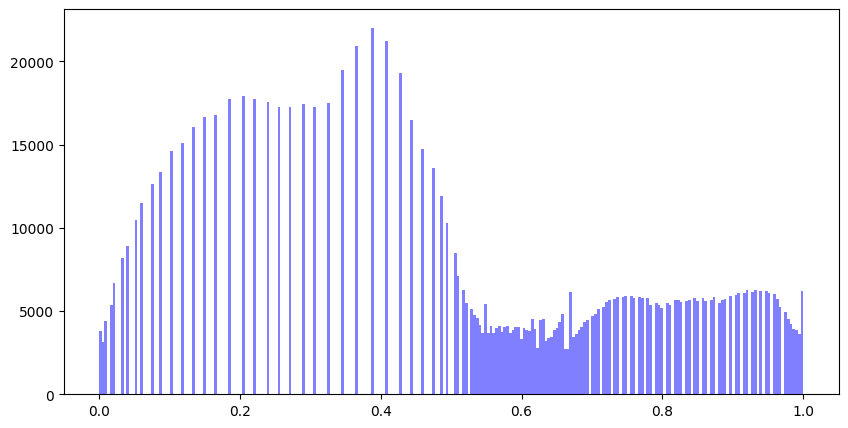

In [12]:
# plot histogram of blue_img_eq
plt.figure(figsize=(10, 5))
plt.hist(img_eq[:, :, 2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue Channel')

- we see that CDF looks very linear (y=x) for all 3 channels. But the histogram is not uniform probably because the image is jpg compressed.
- Also the image looks very bland. We now try partial histogram equalization.

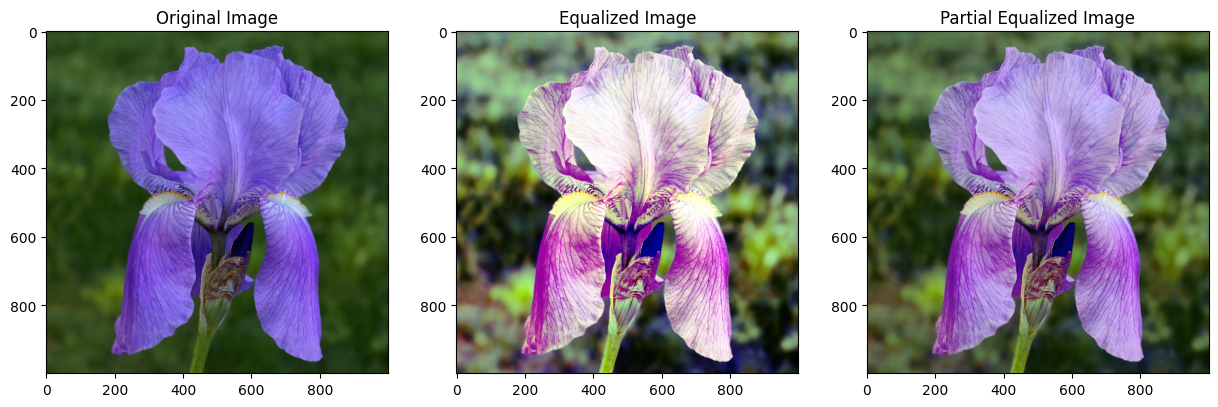

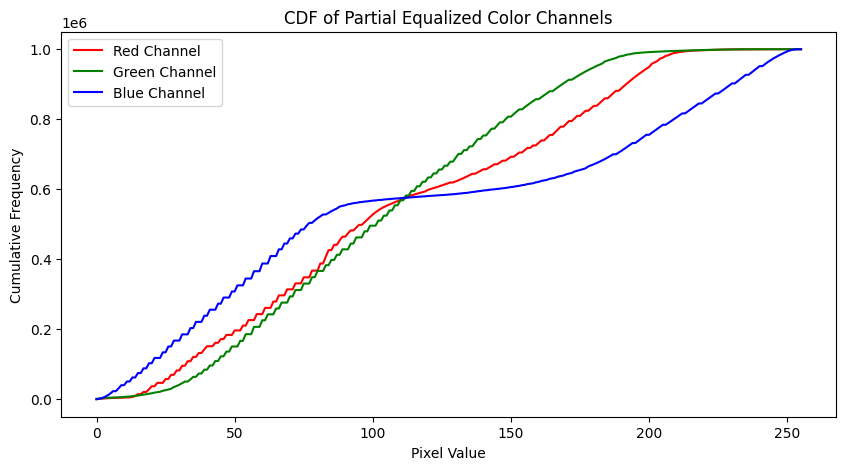

In [13]:
# partial histogram equalization
alpha = 0.995  # blending factor
img_eq_partial = alpha * img_eq + (1 - alpha) * image_rgb
img_eq_partial = img_eq_partial / np.max(img_eq_partial, axis=(0, 1))  # Normalize
plt.figure(figsize=(15, 45))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(img_eq)
plt.title('Equalized Image')
plt.subplot(1, 3, 3)
plt.imshow(img_eq_partial)
plt.title('Partial Equalized Image')
plt.show()

# plot cdf of partial equalized image
red_cdf_partial = np.cumsum(np.histogram(img_eq_partial[:, :, 0], bins=256, range=(0, 1))[0])
green_cdf_partial = np.cumsum(np.histogram(img_eq_partial[:, :, 1], bins=256, range=(0, 1))[0])
blue_cdf_partial = np.cumsum(np.histogram(img_eq_partial[:, :, 2], bins=256, range=(0, 1))[0])
plt.figure(figsize=(10, 5))
plt.plot(red_cdf_partial, color='red', label='Red Channel')
plt.plot(green_cdf_partial, color='green', label='Green Channel')
plt.plot(blue_cdf_partial, color='blue', label='Blue Channel')
plt.title('CDF of Partial Equalized Color Channels')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Frequency')
plt.legend()
plt.show()




### Locally adaptive equalization

Text(0.5, 1.0, 'CLAHE Image')

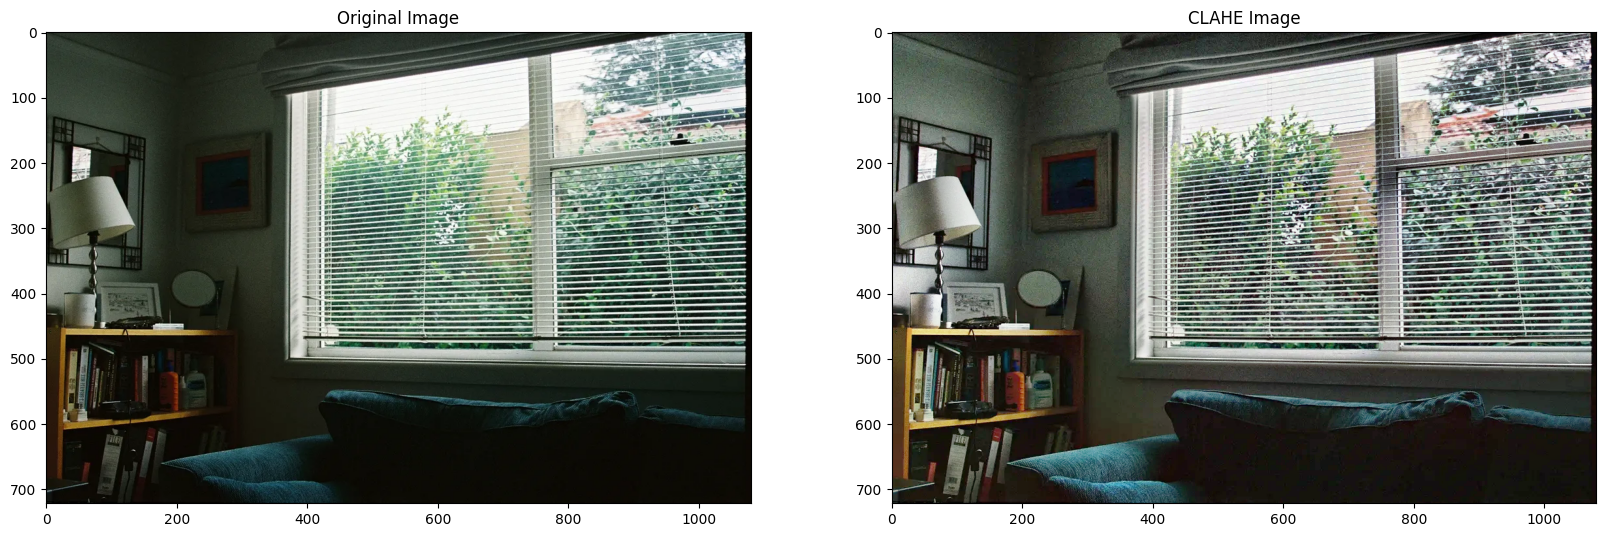

In [15]:
img = cv2.imread('dat/nonHDR.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# locally adaptive histogram equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
red_clahe = clahe.apply(img[:, :, 0])  
green_clahe = clahe.apply(img[:, :, 1])
blue_clahe = clahe.apply(img[:, :, 2])

img_clache = cv2.merge((red_clahe, green_clahe, blue_clahe))
plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img_clache)
plt.title('CLAHE Image')


### Implementing CLAHE

In [ ]:
img = cv2.imread('dat/nonHDR.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

num_block_x = 4
num_block_y = 2
num_block_stridex = 100
num_block_stridey = 80
block_size_x = img.shape[1] // num_block_x
block_size_y = img.shape[0] // num_block_y
stridex = img.shape[1] // num_block_stridex
stridey = img.shape[0] // num_block_stridey
imgs = []
# we stride across the image and apply histogram equalization to each block
for i in range(0, img.shape[0] - block_size_y, stridey):
    for j in range(0, img.shape[1] - block_size_x, stridex):
        block = img[i:i + block_size_y, j:j + block_size_x]
        red_block = cv2.equalizeHist(block[:, :, 0])
        green_block = cv2.equalizeHist(block[:, :, 1])
        blue_block = cv2.equalizeHist(block[:, :, 2])
        equalized_block = cv2.merge((red_block, green_block, blue_block))
        new_img = img.copy()
        new_img[i:i + block_size_y, j:j + block_size_x] = equalized_block
        imgs.append(new_img)
        print(f'Processed block at ({i}, {j})')

# Combine the processed images into a single image, taking average of the images in the list imgs
img_block = np.sum(imgs, axis=0) / len(imgs)
img_block = np.clip(img_block, 0, 255).astype(np.uint8)  # Ensure pixel values are in [0, 255]


    
    
            


Processed block at (0, 0)
Processed block at (0, 10)
Processed block at (0, 20)
Processed block at (0, 30)
Processed block at (0, 40)
Processed block at (0, 50)
Processed block at (0, 60)
Processed block at (0, 70)
Processed block at (0, 80)
Processed block at (0, 90)
Processed block at (0, 100)
Processed block at (0, 110)
Processed block at (0, 120)
Processed block at (0, 130)
Processed block at (0, 140)
Processed block at (0, 150)
Processed block at (0, 160)
Processed block at (0, 170)
Processed block at (0, 180)
Processed block at (0, 190)
Processed block at (0, 200)
Processed block at (0, 210)
Processed block at (0, 220)
Processed block at (0, 230)
Processed block at (0, 240)
Processed block at (0, 250)
Processed block at (0, 260)
Processed block at (0, 270)
Processed block at (0, 280)
Processed block at (0, 290)
Processed block at (0, 300)
Processed block at (0, 310)
Processed block at (0, 320)
Processed block at (0, 330)
Processed block at (0, 340)
Processed block at (0, 350)
Pro

In [ ]:
equalized_img = img_block

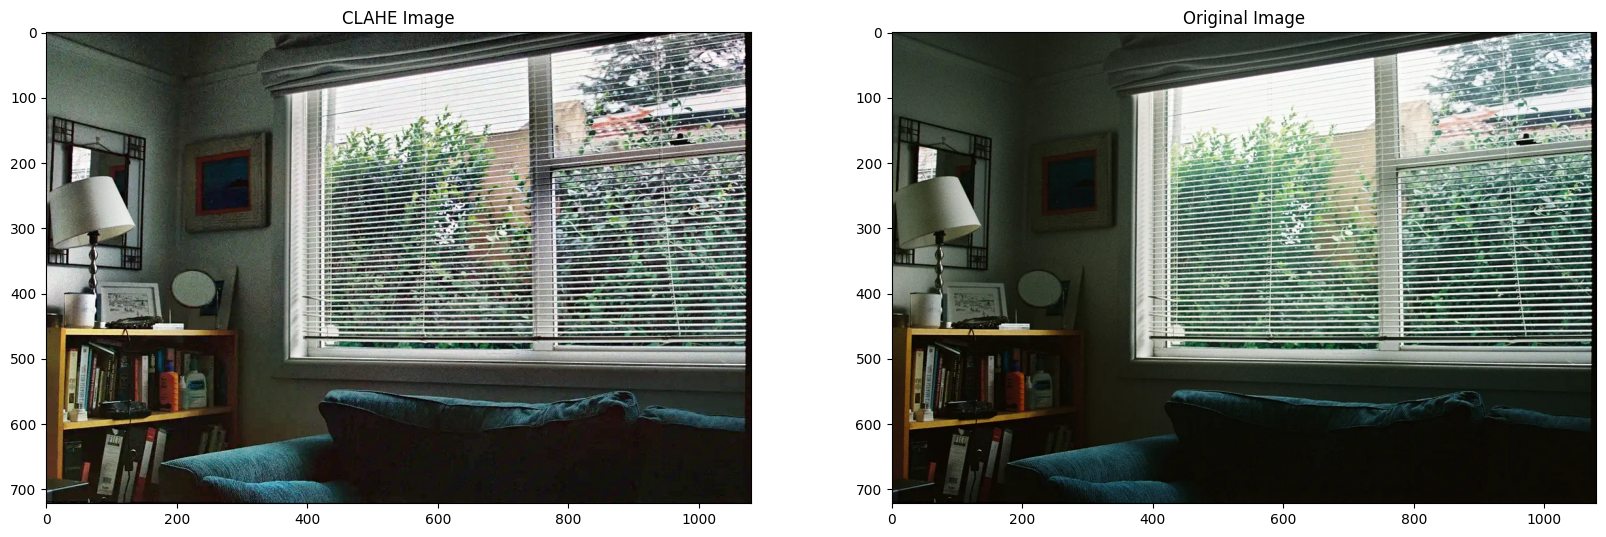

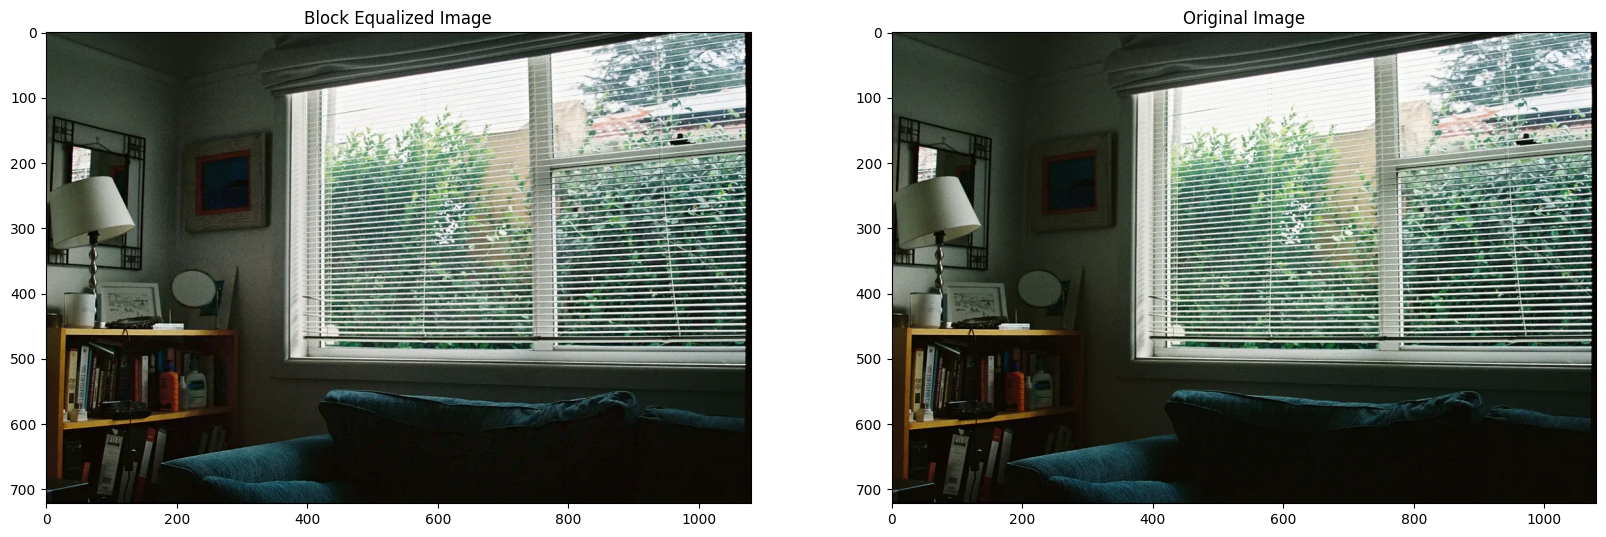

True

In [ ]:
# plot img_clahe and original image and equalized image vs original image
plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.imshow(img_clache)
plt.title('CLAHE Image')
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.title('Original Image')
plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.imshow(equalized_img)
plt.title('Block Equalized Image')
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.title('Original Image')
plt.show()

# Save equalized image
cv2.imwrite('results/result_block_equalized.webp', cv2.cvtColor(equalized_img, cv2.COLOR_RGB2BGR))



In [ ]:
# TODO: Implement center-distance weighting based histogram equalization
# for each block, find CDF of histogram of the block, store in a list, along with block center coordinates
# then for each pixel in img, find distances from each block center, take weighted average of results based on distances